# Challenge 5 - Classification

Date - 8/1/16

Sunne Kuo

Worked with Avi

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
import statsmodels.api as sm

### Challenge 1
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [2]:
votes_df = pd.read_csv('house-votes-84.data.txt', header = None)
votes_df.head()
votes1 = votes_df.copy()

In [3]:
votes_df.replace(['y', 'n', '?'], [1, 0, np.nan], inplace = True)

In [4]:
votes_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [5]:
means = [np.mean(votes_df[x]) for x in range(len(votes_df.columns)) if x > 0]

In [6]:
means = [round(x) for x in  means]
len(votes_df.columns)

17

In [7]:
for x in range(1, len(votes_df.columns)):
    votes_df[x] = votes_df[x].replace(np.nan, round(means[x-1]))

In [8]:
party = votes_df.iloc[:,:1]
votes = votes_df.iloc[:, 1:]
party.replace(['democrat', 'republican'], [1, 0], inplace = True)

### Challenge 2
Split the data into a test and training set.

In [91]:
x_train, x_test, y_train, y_test = train_test_split(votes, np.ravel(party), test_size = .3, random_state = 4444)

### Challenge 3
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat).

Which k value gives the highest accuracy?

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [11]:
accuracy_tup=[]
accuracy = []
for i in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    model = neigh.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, model.predict(x_test)))
    accuracy_tup.append((i, accuracy_score(y_test, model.predict(x_test))))

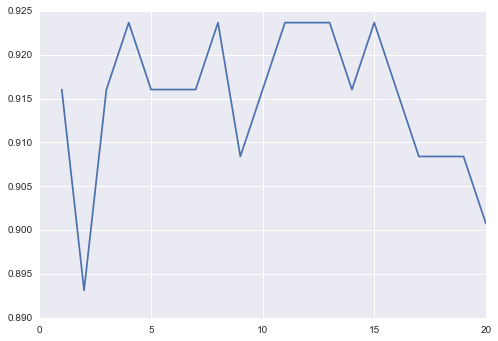

In [12]:
plt.plot(range(1, 21), accuracy)

In [13]:
#accuracy

In [14]:
print ('The most accurate value for k is:')
max(accuracy_tup, key = lambda x: x[1])

The most accurate value for k is:


(4, 0.92366412213740456)

### Challenge 4
Make a similar model but with LogisticRegression instead, calculate test accuracy.



In [15]:
from sklearn.linear_model import LogisticRegression

In [67]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy_score(y_test, logreg.predict(x_test))
logreg_acc = [accuracy_score(y_test, logreg.predict(x_test)) for i in range(1, 21)]
print('Logistic Regression accuracy score:', accuracy_score(y_test, logreg.predict(x_test)))

Logistic Regression accuracy score: 0.826086956522


### Challenge 5
Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.



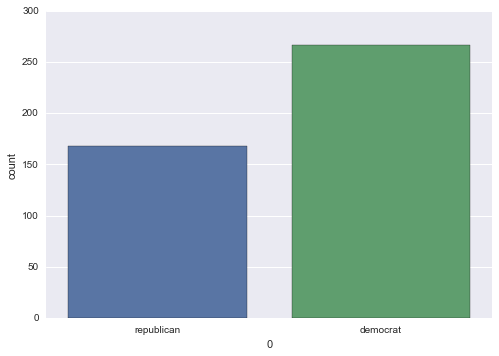

In [17]:
sns.countplot(x = 0, data = votes_df);

In [18]:
d_acc = accuracy_score(y_test, ['democrat' for i in range(len(y_test))])
d_list = [d_acc for i in range(1, 21)]

/Users/sunkuo/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


In [19]:
r_acc = accuracy_score(y_test, ['republican' for i in range(len(y_test))])
r_list = [r_acc for i in range(1, 21)]

/Users/sunkuo/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:177: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


### Challenge 6
Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



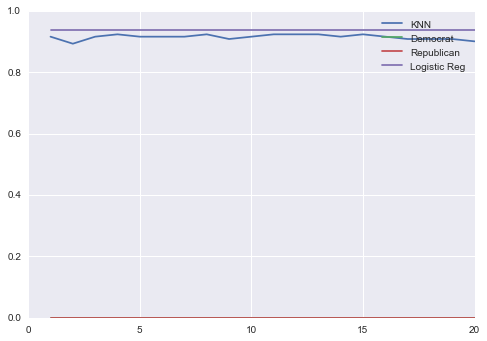

In [20]:
plt.plot(range(1, 21), accuracy, label = 'KNN')
plt.plot(range(1, 21), d_list, label = 'Democrat')
plt.plot(range(1, 21), r_list, label = 'Republican')
plt.plot(range(1, 21), logreg_acc, label = 'Logistic Reg')
plt.legend()

### Challenge 7
Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [82]:
from sklearn.learning_curve import learning_curve

In [83]:
logreg1 = LogisticRegression()
train_sizes, train_scores, test_scores = learning_curve(
    logreg1, votes, np.ravel(party), cv = 5)

In [84]:
train_cv_score = np.mean(train_scores, axis=1)
test_cv_score = np.mean(test_scores, axis = 1)

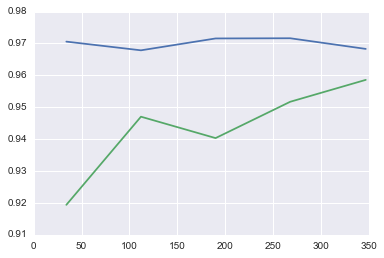

In [85]:
plt.plot(train_sizes, train_cv_score)
plt.plot(train_sizes, test_cv_score)
plt.show()

In [86]:

train_sizes, train_scores, test_scores = learning_curve(
    neigh, votes, np.ravel(party))

In [87]:
train_cv_score1 = np.mean(train_scores, axis=1)
test_cv_score1 = np.mean(test_scores, axis=1)

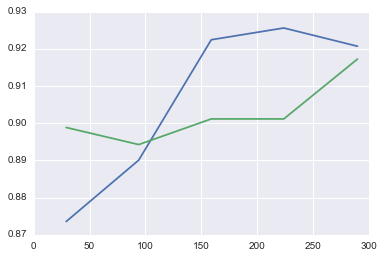

In [88]:
plt.plot(train_sizes, train_cv_score1)
plt.plot(train_sizes, test_cv_score1)
plt.show()

### Challenge 8
This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
SVM (Support Vector Machine) Classifier

from sklearn.svm import SVC
Decision Tree

from sklearn.tree import DecisionTreeClassifier
Random Forest

from sklearn.ensemble import RandomForestClassifier

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [92]:
nb = GaussianNB()
nb.fit(x_train, y_train)
accuracy_score(y_test, nb.predict(x_test))

0.93893129770992367

In [30]:
svm = SVC()
svm.fit(x_train, y_train)
accuracy_score(y_test, svm.predict(x_test))

0.95419847328244278

In [31]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
accuracy_score(y_test, tree.predict(x_test))

0.92366412213740456

In [32]:
ensem = RandomForestClassifier()
ensem.fit(x_train, y_train)
accuracy_score(y_test, ensem.predict(x_test))

0.95419847328244278

### Challenge 9
There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [33]:
from sklearn.cross_validation import cross_val_score

In [34]:
print('Naive Bayes:', np.mean(cross_val_score(nb, votes, np.ravel(party))))
print('\n')
print('Support Vector Machines:', np.mean(cross_val_score(svm, votes, np.ravel(party))))
print('\n')
print('Decision Tree:', np.mean(cross_val_score(tree, votes, np.ravel(party))))
print('\n')
print('Random Forests:', np.mean(cross_val_score(ensem, votes, np.ravel(party))))

Naive Bayes: 0.926436781609


Support Vector Machines: 0.95632183908


Decision Tree: 0.937931034483


Random Forests: 0.95632183908


### Challenge 10
Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [35]:
votes1 = votes1.iloc[:, 1:].replace(['y', 'n', '?'], [1, 0, np.nan])


In [36]:
votes1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [37]:
modes = [votes1.mode().iloc[0]]

In [38]:
votes1 = votes.fillna(votes1.mode().iloc[0])

In [39]:
votes_test = votes1.iloc[:, :15]
votes_pred = votes1.iloc[:, 15]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(votes_test, votes_pred, test_size = .3, random_state = 4444)

In [41]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy = accuracy_score(y_test, logreg.predict(x_test))
#logreg_acc = [accuracy_score(y_test, logreg.predict(x_test)) for i in range(1, 21)]

In [42]:
accuracy

0.83206106870229013

In [43]:
np.mean(cross_val_score(logreg, votes_test, votes_pred))

0.84822359558424754

### Challenge 11
Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [44]:
from patsy import dmatrices
import scipy as sp
import statsmodels.api as sm

In [45]:
movies = pd.read_csv('2013_movies.csv')

In [46]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [47]:
movies['ReleaseDate'] = pd.to_datetime(movies['ReleaseDate'])
movies['Release_Month'] = movies['ReleaseDate'].apply(lambda x: x.month)
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Release_Month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5


In [48]:
x, y = dmatrices('Release_Month ~ Budget + DomesticTotalGross + Runtime + Rating ',\
                 data = movies, return_type = 'dataframe')

In [73]:
x_train, x_test, y_train, y_test = train_test_split(y, np.ravel(x), test_size = .3, random_state = 4444)

In [77]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy = accuracy_score(y_test, logreg.predict(x_test))
coefficients = logreg.coef_
print(accuracy)
coefficients

0.148148148148


array([[ -8.88418688e-16,  -1.00611755e-15,  -1.87466511e-15,
          1.99236397e-15,  -1.38326451e-08,  -4.70519257e-08,
         -1.47653741e-13],
       [ -2.05274548e-15,   5.00738962e-16,  -4.69603372e-16,
         -2.08388107e-15,  -5.91656070e-09,  -3.60791854e-08,
         -2.69239082e-13],
       [ -2.65720653e-15,  -1.94341665e-16,  -7.78710098e-16,
         -1.68415477e-15,   3.93343546e-09,  -2.82215536e-08,
         -2.87300478e-13],
       [ -8.69956608e-16,  -4.92034155e-16,   5.67844094e-16,
         -9.45766546e-16,  -1.35003665e-08,  -2.09061215e-08,
         -5.56200878e-14],
       [ -1.25232671e-15,  -2.68439005e-16,  -1.64351013e-16,
         -8.19536693e-16,  -4.52979488e-09,  -8.06640951e-09,
         -1.29259278e-13],
       [ -3.31191732e-15,  -7.49196267e-16,  -1.18622445e-15,
         -1.37649661e-15,  -2.03503107e-08,  -1.03053793e-08,
         -3.58154818e-13],
       [ -1.85894368e-15,  -3.49747479e-16,   8.18760077e-17,
         -1.59107221e-15,   9.25

Since the accuracy is very low and the coefficients for each predicted variable is very low, the independent variables have very little effect on the predicted variables.

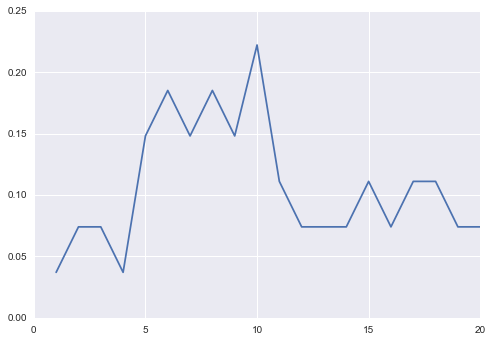

In [51]:
accuracy_tup=[]
accuracy = []
for i in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    model = neigh.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, model.predict(x_test)))
    accuracy_tup.append((i, accuracy_score(y_test, model.predict(x_test))))

max(accuracy_tup, key = lambda x: x[1])
plt.plot(range(1,21), accuracy)

### Challenge 12
Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

In [52]:
haber = pd.read_csv('haberman.data.txt', header = None)
haber.columns = ['age', 'yr_of_op', 'nbr_nodes', 'survival']
haber['survival'].replace(2, 0)
haber.head()

,age,yr_of_op,nbr_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [53]:
print('Average Age is', round(haber['age'].mean(),1))
print('Standard Dev is', round(haber['age'].std(),1))

Average Age is 52.5
Standard Dev is 10.8


In [54]:
survived_df = haber.loc[haber['survival'] == 1]
print('Average Age given patient survived >5 years is', round(survived_df['age'].mean(),1))
print('Standard Dev given patient survived >5 years is', round(survived_df['age'].std(),1))

Average Age given patient survived >5 years is 52.0
Standard Dev given patient survived >5 years is 11.0


In [55]:
import seaborn as sns

In [68]:
#plt.hist([haber['age'], haber['nbr_nodes']], color = ['r', 'b'])

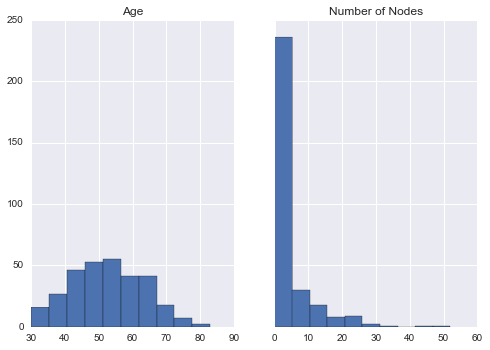

In [57]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(haber['age'])
ax1.set_title('Age')
ax2.hist(haber['nbr_nodes'])
ax2.set_title('Number of Nodes')

In [58]:
haber['year'] = haber['yr_of_op'].apply(lambda x: x+1900)

In [59]:
print('Earliest year is', min(haber['year']))

Earliest year is 1958


In [60]:
print('Most recent year is', max(haber['year']))

Most recent year is 1969


In [61]:
b, a= dmatrices('survival ~ nbr_nodes + age ', data = haber, return_type = 'dataframe')
x_train, x_test, y_train, y_test = train_test_split(a, np.ravel(b), test_size = .3, random_state = 4444)


In [62]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
accuracy = accuracy_score(y_test, logreg.predict(x_test))
print('Accuracy score for logistic regression is',round(accuracy, 2))
print('Coefficients of the regression are', logreg.coef_)

Accuracy score for logistic regression is 0.83
Coefficients of the regression are [[-0.81728231  0.06937882  0.00778747]]


Number of Nodes has the biggest effect on the predictive value of the model.

In [63]:
train_sizes, train_scores, test_scores = learning_curve(
    logreg, a, np.ravel(b), cv = 5)

In [64]:
train_cv_score = np.mean(train_scores, axis=1)
test_cv_score = np.mean(test_scores, axis = 1)

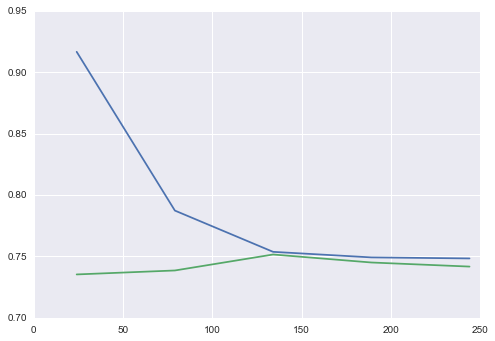

In [65]:
plt.plot(train_sizes, train_cv_score)
plt.plot(train_sizes, test_cv_score)
plt.show()